## Inverse Transform Sampling

Inverse transform sampling allows to generate samples at random for any probability distribution, given its CDF (cumulative distribution function). The gist of it is as follows:

* 1- Normalize a distribution in terms of its CDF (cumulative distribution function).

* 2- Generate a random number u from standard uniform distribution in interval [0, 1].

* 3- Compute an event x from the distrubtion such that f(x) = u.

* 4- Take x to be the random event drawn from the distribtion.

### Baby Birth Weight Statistics
https://www.verywellfamily.com/baby-birth-weight-statistics-2633630

In 2013, there were:

* 55,947 births at 1499g or less (3.3 pounds or less)
* 61,992 births from 1500g to 1999g (3.3 to 4.4 pounds)
* 200,908 births from 2000g to 2499g (4.4 to 5.5 pounds)
* 727,987 births from 2500g to 2999g (5.5 to 6.6 pounds)
* 1,546,274 births from 3000g to 3499g (6.6 to 7.7 pounds)
* 1,071,007 births from 3500g to 3999g (7.7 to 8.8 pounds)
* 276,592 births from 4000g to 4499g (8.8 to 9.9 pounds)
* 39,353 births from 4500g to 4999g (9.9 to 11 pounds)
* 4,746 births from 5000g to 8165g (11 to 18 pounds)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = [[0,1,2,3,4,5,6,7,8],[55947,61992,200908,727987,1546274,1071007,276592,39353,4746]]

In [3]:
energies = np.array(data[0])
fluxes = np.array(data[1])

<BarContainer object of 9 artists>

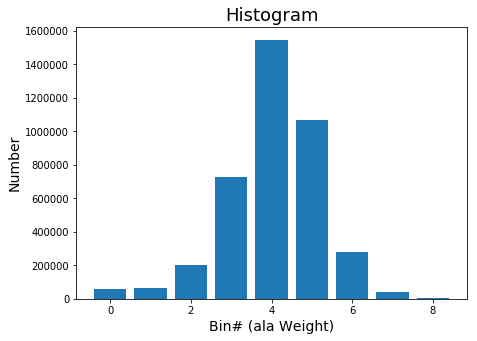

In [4]:
plt.figure(figsize=(7,5))
plt.xlabel('Bin# (ala Weight)', fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.title('Histogram',fontsize=18)
plt.bar(energies,fluxes, linewidth=3)

In [5]:
prob = fluxes/float(sum(fluxes))
prob

array([0.01404008, 0.01555709, 0.05041851, 0.1826907 , 0.38804248,
       0.26877268, 0.06941166, 0.00987576, 0.00119102])

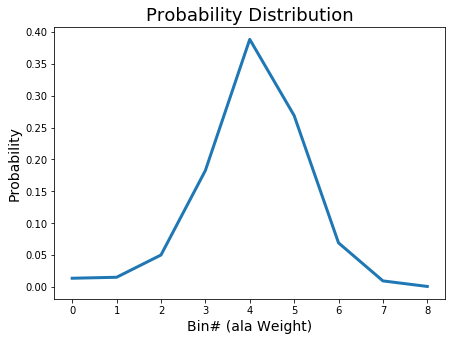

In [6]:
plt.figure(figsize=(7,5))
plt.xlabel('Bin# (ala Weight)', fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.title('Probability Distribution',fontsize=18)
plt.plot(energies,prob,linewidth=3)

In [7]:
cum_prob = np.cumsum(prob)
cum_prob

array([0.01404008, 0.02959717, 0.08001569, 0.26270639, 0.65074887,
       0.91952155, 0.98893321, 0.99880898, 1.        ])

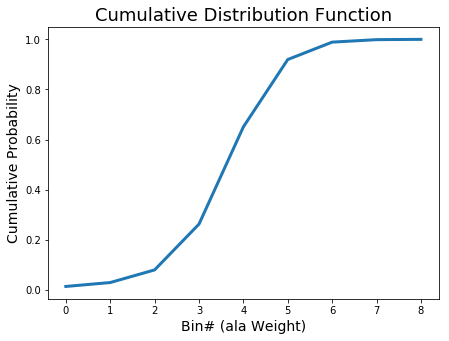

In [8]:
plt.figure(figsize=(7,5))
plt.xlabel('Bin# (ala Weight)', fontsize=14)
plt.ylabel('Cumulative Probability',fontsize=14)
plt.title('Cumulative Distribution Function',fontsize=18)
plt.plot(energies,cum_prob,linewidth=3)

In [9]:
def random_sample(N):
    R = np.random.uniform(0, 1, N)
    gen_energies = [int(energies[np.argwhere(cum_prob == min(cum_prob[(cum_prob - r) > 0]))]) for r in R]
    times = np.arange(0, 9, 1)
    lc = np.bincount(gen_energies, minlength=len(times))
    lc_prob = lc/sum(lc)
    return lc_prob

In [10]:
N_100 = random_sample(100)
N_1000 = random_sample(1000)
N_10000 = random_sample(10000)

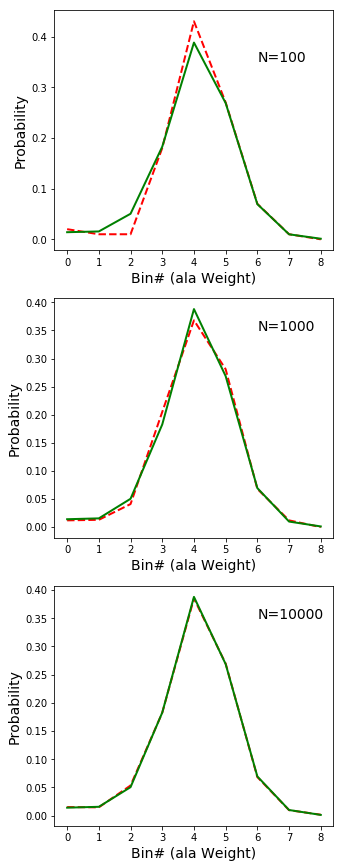

In [11]:
plt.figure(figsize=(5,15))
plt.subplot(3,1,1)
plt.plot(N_100, 'r--', label='Assigned energies',linewidth=2)
plt.plot(prob,'g',label='Original Spectrum',linewidth=2)
plt.xlabel('Bin# (ala Weight)',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.text(6,0.35,"N=100",fontsize=14)

plt.subplot(3,1,2)
plt.plot(N_1000, 'r--', label='Assigned energies',linewidth=2)
plt.plot(prob,'g',label='Original Spectrum',linewidth=2)
plt.xlabel('Bin# (ala Weight)',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.text(6,0.35,"N=1000",fontsize=14)

plt.subplot(3,1,3)
plt.plot(N_10000, 'r--', label='Assigned energies',linewidth=2)
plt.plot(prob,'g',label='Original Spectrum',linewidth=2)
plt.xlabel('Bin# (ala Weight)',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.text(6,0.35,"N=10000",fontsize=14)

plt.show()
